# 1. Download and Load Kaggle Dataset

In [1]:
import kagglehub
import pandas as pd

# Download dataset
path = kagglehub.dataset_download("vagifa/ethereum-frauddetection-dataset")
print("Path to dataset files:", path)

# Load the CSV (adjust file name if needed)
df = pd.read_csv(f"{path}/transaction_dataset.csv")
print(df.head())

100%|██████████| 923k/923k [00:00<00:00, 115MB/s]

Extracting files...
Path to dataset files: /root/.cache/kagglehub/datasets/vagifa/ethereum-frauddetection-dataset/versions/1
   Unnamed: 0  Index                                     Address  FLAG  \
0           0      1  0x00009277775ac7d0d59eaad8fee3d10ac6c805e8     0   
1           1      2  0x0002b44ddb1476db43c868bd494422ee4c136fed     0   
2           2      3  0x0002bda54cb772d040f779e88eb453cac0daa244     0   
3           3      4  0x00038e6ba2fd5c09aedb96697c8d7b8fa6632e5e     0   
4           4      5  0x00062d1dd1afb6fb02540ddad9cdebfe568e0d89     0   

   Avg min between sent tnx  Avg min between received tnx  \
0                    844.26                       1093.71   
1                  12709.07                       2958.44   
2                 246194.54                       2434.02   
3                  10219.60                      15785.09   
4                     36.61                      10707.77   

   Time Diff between first and last (Mins)  Sent tnx  Received 

# 2. Explopratory Data Analysis
In this phase, we will try to explore our dataset, remove outliers or duplicates if exist. In addition to that we will make some visualizations to understand more the incorporated relationships between the main features and its variance. 📊📈📉

## Data Preprocessing

In [2]:
print("Shape of the dataset:")
df.shape
print("Dataset Columns:")
df.columns

Shape of the dataset:
Dataset Columns:


Index(['Unnamed: 0', 'Index', 'Address', 'FLAG', 'Avg min between sent tnx',
       'Avg min between received tnx',
       'Time Diff between first and last (Mins)', 'Sent tnx', 'Received Tnx',
       'Number of Created Contracts', 'Unique Received From Addresses',
       'Unique Sent To Addresses', 'min value received', 'max value received ',
       'avg val received', 'min val sent', 'max val sent', 'avg val sent',
       'min value sent to contract', 'max val sent to contract',
       'avg value sent to contract',
       'total transactions (including tnx to create contract',
       'total Ether sent', 'total ether received',
       'total ether sent contracts', 'total ether balance',
       ' Total ERC20 tnxs', ' ERC20 total Ether received',
       ' ERC20 total ether sent', ' ERC20 total Ether sent contract',
       ' ERC20 uniq sent addr', ' ERC20 uniq rec addr',
       ' ERC20 uniq sent addr.1', ' ERC20 uniq rec contract addr',
       ' ERC20 avg time between sent tnx', ' ERC20 

In [3]:
print("First 5 rows of the dataset:")
df.head()

First 5 rows of the dataset:


,Unnamed: 0,Index,Address,FLAG,Avg min between sent tnx,Avg min between received tnx,Time Diff between first and last (Mins),Sent tnx,Received Tnx,Number of Created Contracts,...,ERC20 min val sent,ERC20 max val sent,ERC20 avg val sent,ERC20 min val sent contract,ERC20 max val sent contract,ERC20 avg val sent contract,ERC20 uniq sent token name,ERC20 uniq rec token name,ERC20 most sent token type,ERC20_most_rec_token_type
0,0,1,0x00009277775ac7d0d59eaad8fee3d10ac6c805e8,0,844.26,1093.71,704785.63,721,89,0,...,0.000000,1.683100e+07,271779.920000,0.0,0.0,0.0,39.0,57.0,Cofoundit,Numeraire
1,1,2,0x0002b44ddb1476db43c868bd494422ee4c136fed,0,12709.07,2958.44,1218216.73,94,8,0,...,2.260809,2.260809e+00,2.260809,0.0,0.0,0.0,1.0,7.0,Livepeer Token,Livepeer Token
2,2,3,0x0002bda54cb772d040f779e88eb453cac0daa244,0,246194.54,2434.02,516729.30,2,10,0,...,0.000000,0.000000e+00,0.000000,0.0,0.0,0.0,0.0,8.0,NaN,XENON
3,3,4,0x00038e6ba2fd5c09aedb96697c8d7b8fa6632e5e,0,10219.60,15785.09,397555.90,25,9,0,...,100.000000,9.029231e+03,3804.076893,0.0,0.0,0.0,1.0,11.0,Raiden,XENON
4,4,5,0x00062d1dd1afb6fb02540ddad9cdebfe568e0d89,0,36.61,10707.77,382472.42,4598,20,1,...,0.000000,4.500000e+04,13726.659220,0.0,0.0,0.0,6.0,27.0,StatusNetwork,EOS


In [4]:
print("Dataset Information:")
df.info()

Dataset Information:
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 9841 entries, 0 to 9840
Data columns (total 51 columns):
 #   Column                                                Non-Null Count  Dtype  
---  ------                                                --------------  -----  
 0   Unnamed: 0                                            9841 non-null   int64  
 1   Index                                                 9841 non-null   int64  
 2   Address                                               9841 non-null   object 
 3   FLAG                                                  9841 non-null   int64  
 4   Avg min between sent tnx                              9841 non-null   float64
 5   Avg min between received tnx                          9841 non-null   float64
 6   Time Diff between first and last (Mins)               9841 non-null   float64
 7   Sent tnx                                              9841 non-null   int64  
 8   Received Tnx                         

In [5]:
print("Statistical Summary:")
df.describe()

Statistical Summary:


,Unnamed: 0,Index,FLAG,Avg min between sent tnx,Avg min between received tnx,Time Diff between first and last (Mins),Sent tnx,Received Tnx,Number of Created Contracts,Unique Received From Addresses,...,ERC20 max val rec,ERC20 avg val rec,ERC20 min val sent,ERC20 max val sent,ERC20 avg val sent,ERC20 min val sent contract,ERC20 max val sent contract,ERC20 avg val sent contract,ERC20 uniq sent token name,ERC20 uniq rec token name
count,9841.000000,9841.000000,9841.000000,9841.000000,9841.000000,9.841000e+03,9841.000000,9841.000000,9841.000000,9841.000000,...,9.012000e+03,9.012000e+03,9.012000e+03,9.012000e+03,9.012000e+03,9012.0,9012.0,9012.0,9012.000000,9012.000000
mean,4920.000000,1815.049893,0.221421,5086.878721,8004.851184,2.183333e+05,115.931714,163.700945,3.729702,30.360939,...,1.252524e+08,4.346203e+06,1.174126e+04,1.303594e+07,6.318389e+06,0.0,0.0,0.0,1.384931,4.826676
std,2840.996333,1222.621830,0.415224,21486.549974,23081.714801,3.229379e+05,757.226361,940.836550,141.445583,298.621112,...,1.053741e+10,2.141192e+08,1.053567e+06,1.179905e+09,5.914764e+08,0.0,0.0,0.0,6.735121,16.678607
min,0.000000,1.000000,0.000000,0.000000,0.000000,0.000000e+00,0.000000,0.000000,0.000000,0.000000,...,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.0,0.0,0.0,0.000000,0.000000
25%,2460.000000,821.000000,0.000000,0.000000,0.000000,3.169300e+02,1.000000,1.000000,0.000000,1.000000,...,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.0,0.0,0.0,0.000000,0.000000
50%,4920.000000,1641.000000,0.000000,17.340000,509.770000,4.663703e+04,3.000000,4.000000,0.000000,2.000000,...,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.0,0.0,0.0,0.000000,1.000000
75%,7380.000000,2601.000000,0.000000,565.470000,5480.390000,3.040710e+05,11.000000,27.000000,0.000000,5.000000,...,9.900000e+01,2.946467e+01,0.000000e+00,0.000000e+00,0.000000e+00,0.0,0.0,0.0,0.000000,2.000000
max,9840.000000,4729.000000,1.000000,430287.670000,482175.490000,1.954861e+06,10000.000000,10000.000000,9995.000000,9999.000000,...,1.000000e+12,1.724181e+10,1.000000e+08,1.120000e+11,5.614756e+10,0.0,0.0,0.0,213.000000,737.000000


In [6]:
print("Missing Values: ")
df.isnull().sum()

Missing Values: 


,0
Unnamed: 0,0
Index,0
Address,0
FLAG,0
Avg min between sent tnx,0
Avg min between received tnx,0
Time Diff between first and last (Mins),0
Sent tnx,0
Received Tnx,0
Number of Created Contracts,0


In [7]:
print("Duplicated Values: ")
df.duplicated().sum()

Duplicated Values: 


np.int64(0)

##Data Visualization

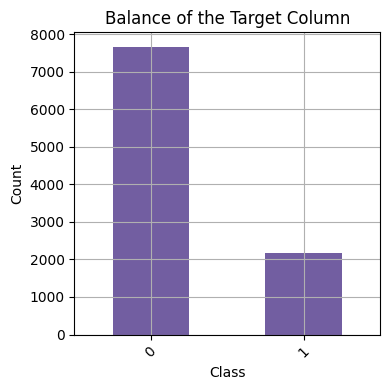

In [8]:
import matplotlib.pyplot as plt

# Check the balance of the target class (0 = Non-Fraud, 1 = Fraud )
df['FLAG'].value_counts().plot(kind='bar',
                                figsize=(4, 4),
                                title='Balance of the Target Column',
                                xlabel='Class',
                                ylabel='Count',
                                rot=45,
                                grid=True,
                                alpha=0.7,
                                color='#371A79')
plt.tight_layout()
plt.show()

Columns included in correlation:
Index(['Unnamed: 0', 'Index', 'Avg min between sent tnx',
       'Avg min between received tnx',
       'Time Diff between first and last (Mins)', 'Sent tnx', 'Received Tnx',
       'Number of Created Contracts', 'Unique Received From Addresses',
       'Unique Sent To Addresses', 'min value received', 'max value received ',
       'avg val received', 'min val sent', 'max val sent', 'avg val sent',
       'min value sent to contract', 'max val sent to contract',
       'avg value sent to contract',
       'total transactions (including tnx to create contract',
       'total Ether sent', 'total ether received',
       'total ether sent contracts', 'total ether balance',
       ' Total ERC20 tnxs', ' ERC20 total Ether received',
       ' ERC20 total ether sent', ' ERC20 total Ether sent contract',
       ' ERC20 uniq sent addr', ' ERC20 uniq rec addr',
       ' ERC20 uniq sent addr.1', ' ERC20 uniq rec contract addr',
       ' ERC20 avg time between sent 

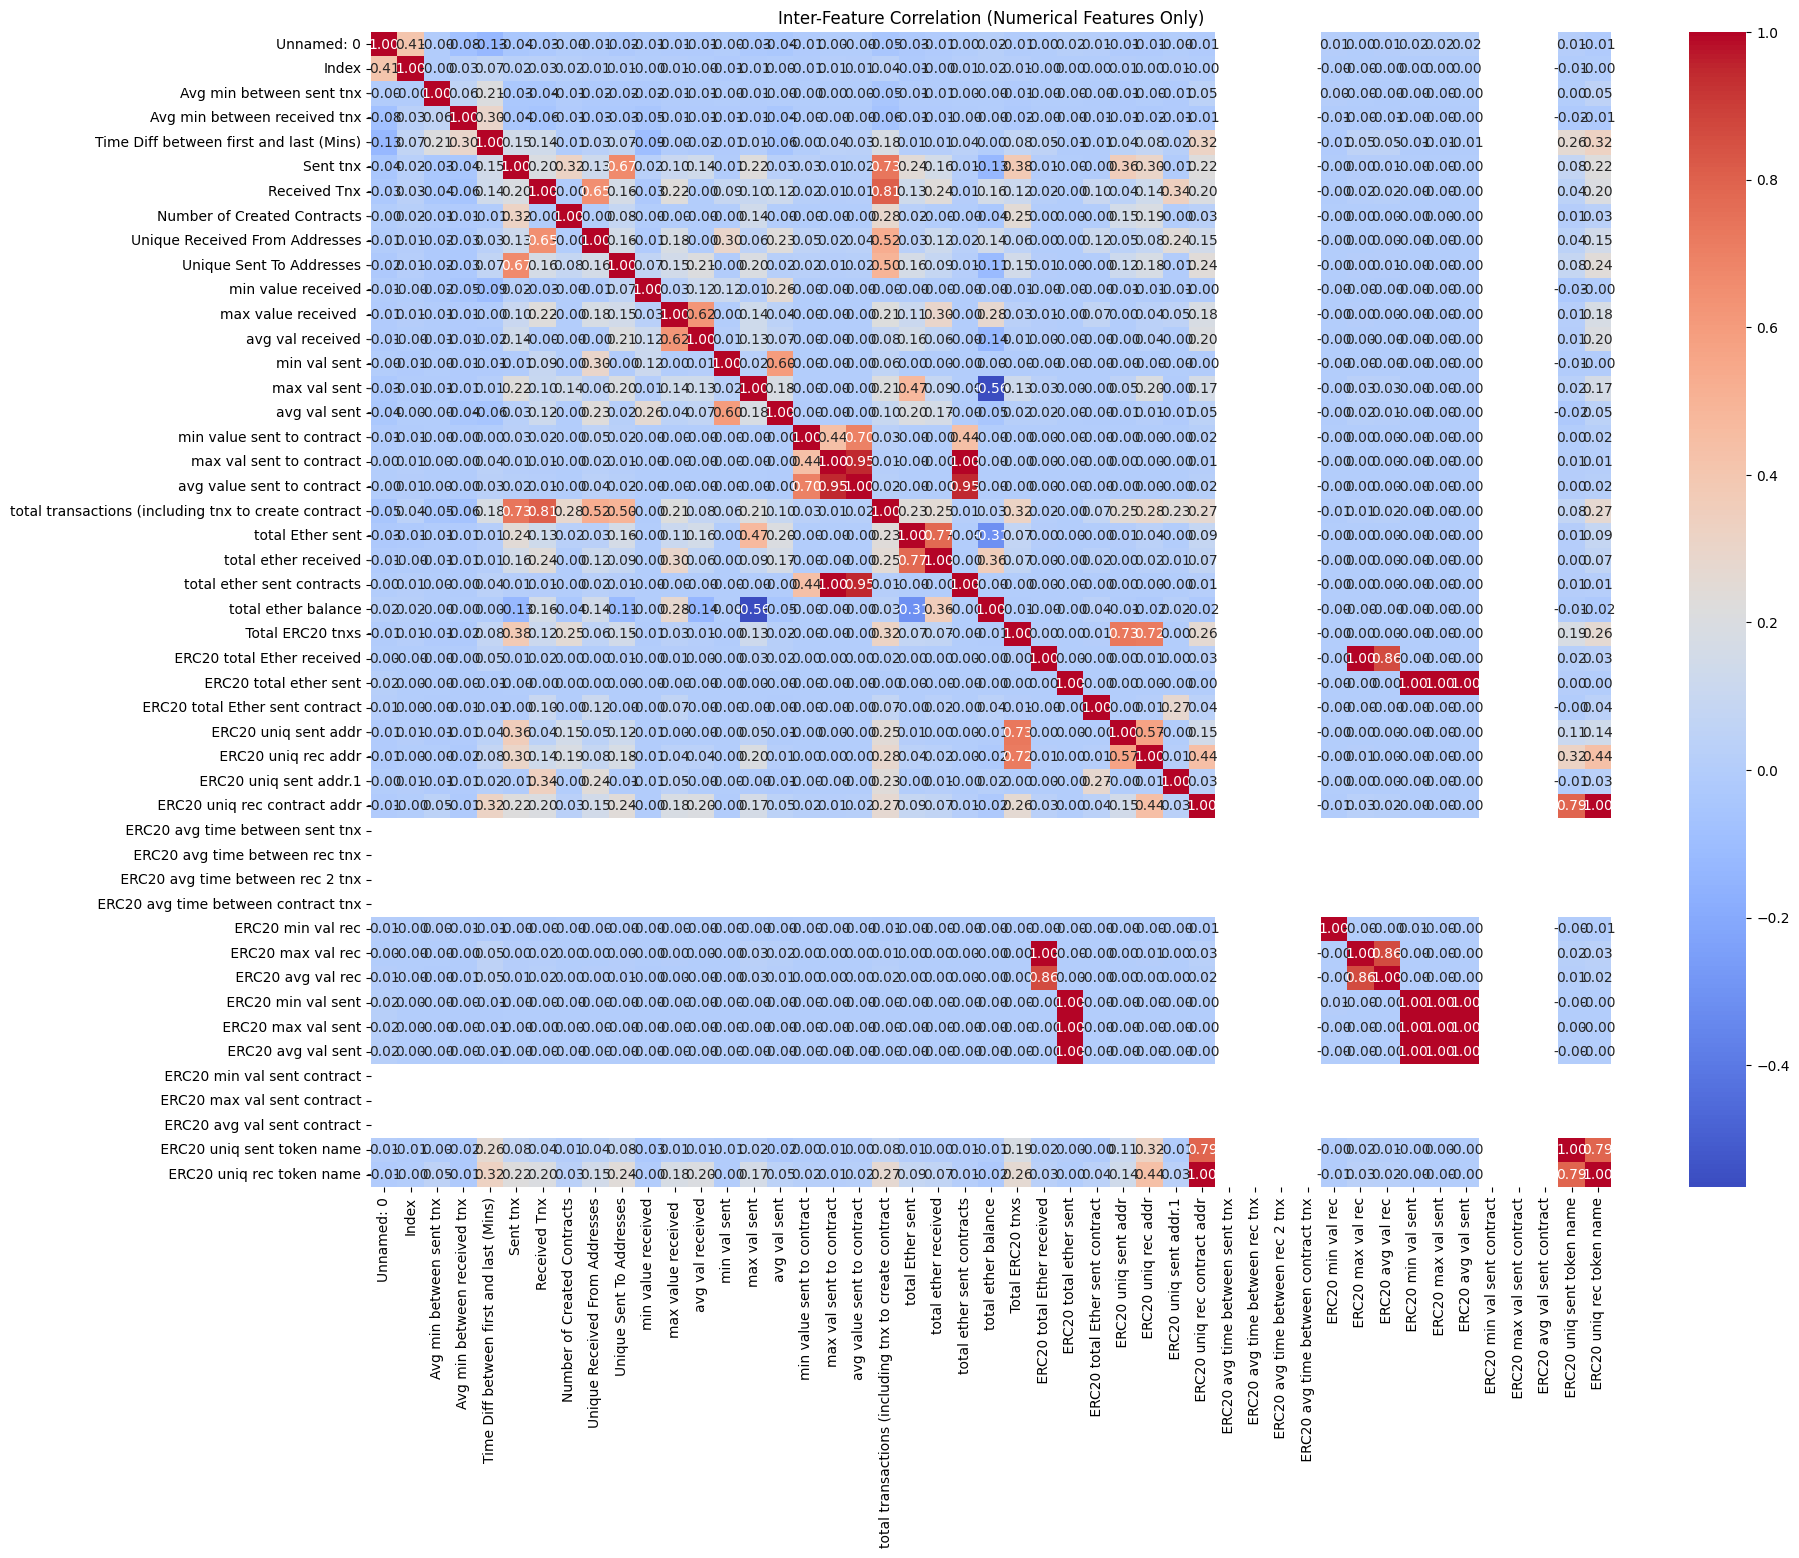

In [9]:
import pandas as pd
import seaborn as sns
import numpy as np

# Drop the 'FLAG' column as you intended for the features
features = df.drop(columns=['FLAG'])
numerical_features = features.select_dtypes(include=np.number)
numerical_features = numerical_features.dropna()

print("Columns included in correlation:")
print(numerical_features.columns)

# Calculate the correlation matrix
correlation_matrix = numerical_features.corr()

# Plot the heatmap
plt.figure(figsize=(20, 15))
sns.heatmap(correlation_matrix, annot=True, cmap='coolwarm', fmt=".2f")
plt.title('Inter-Feature Correlation (Numerical Features Only)')
plt.show()
plt.close()

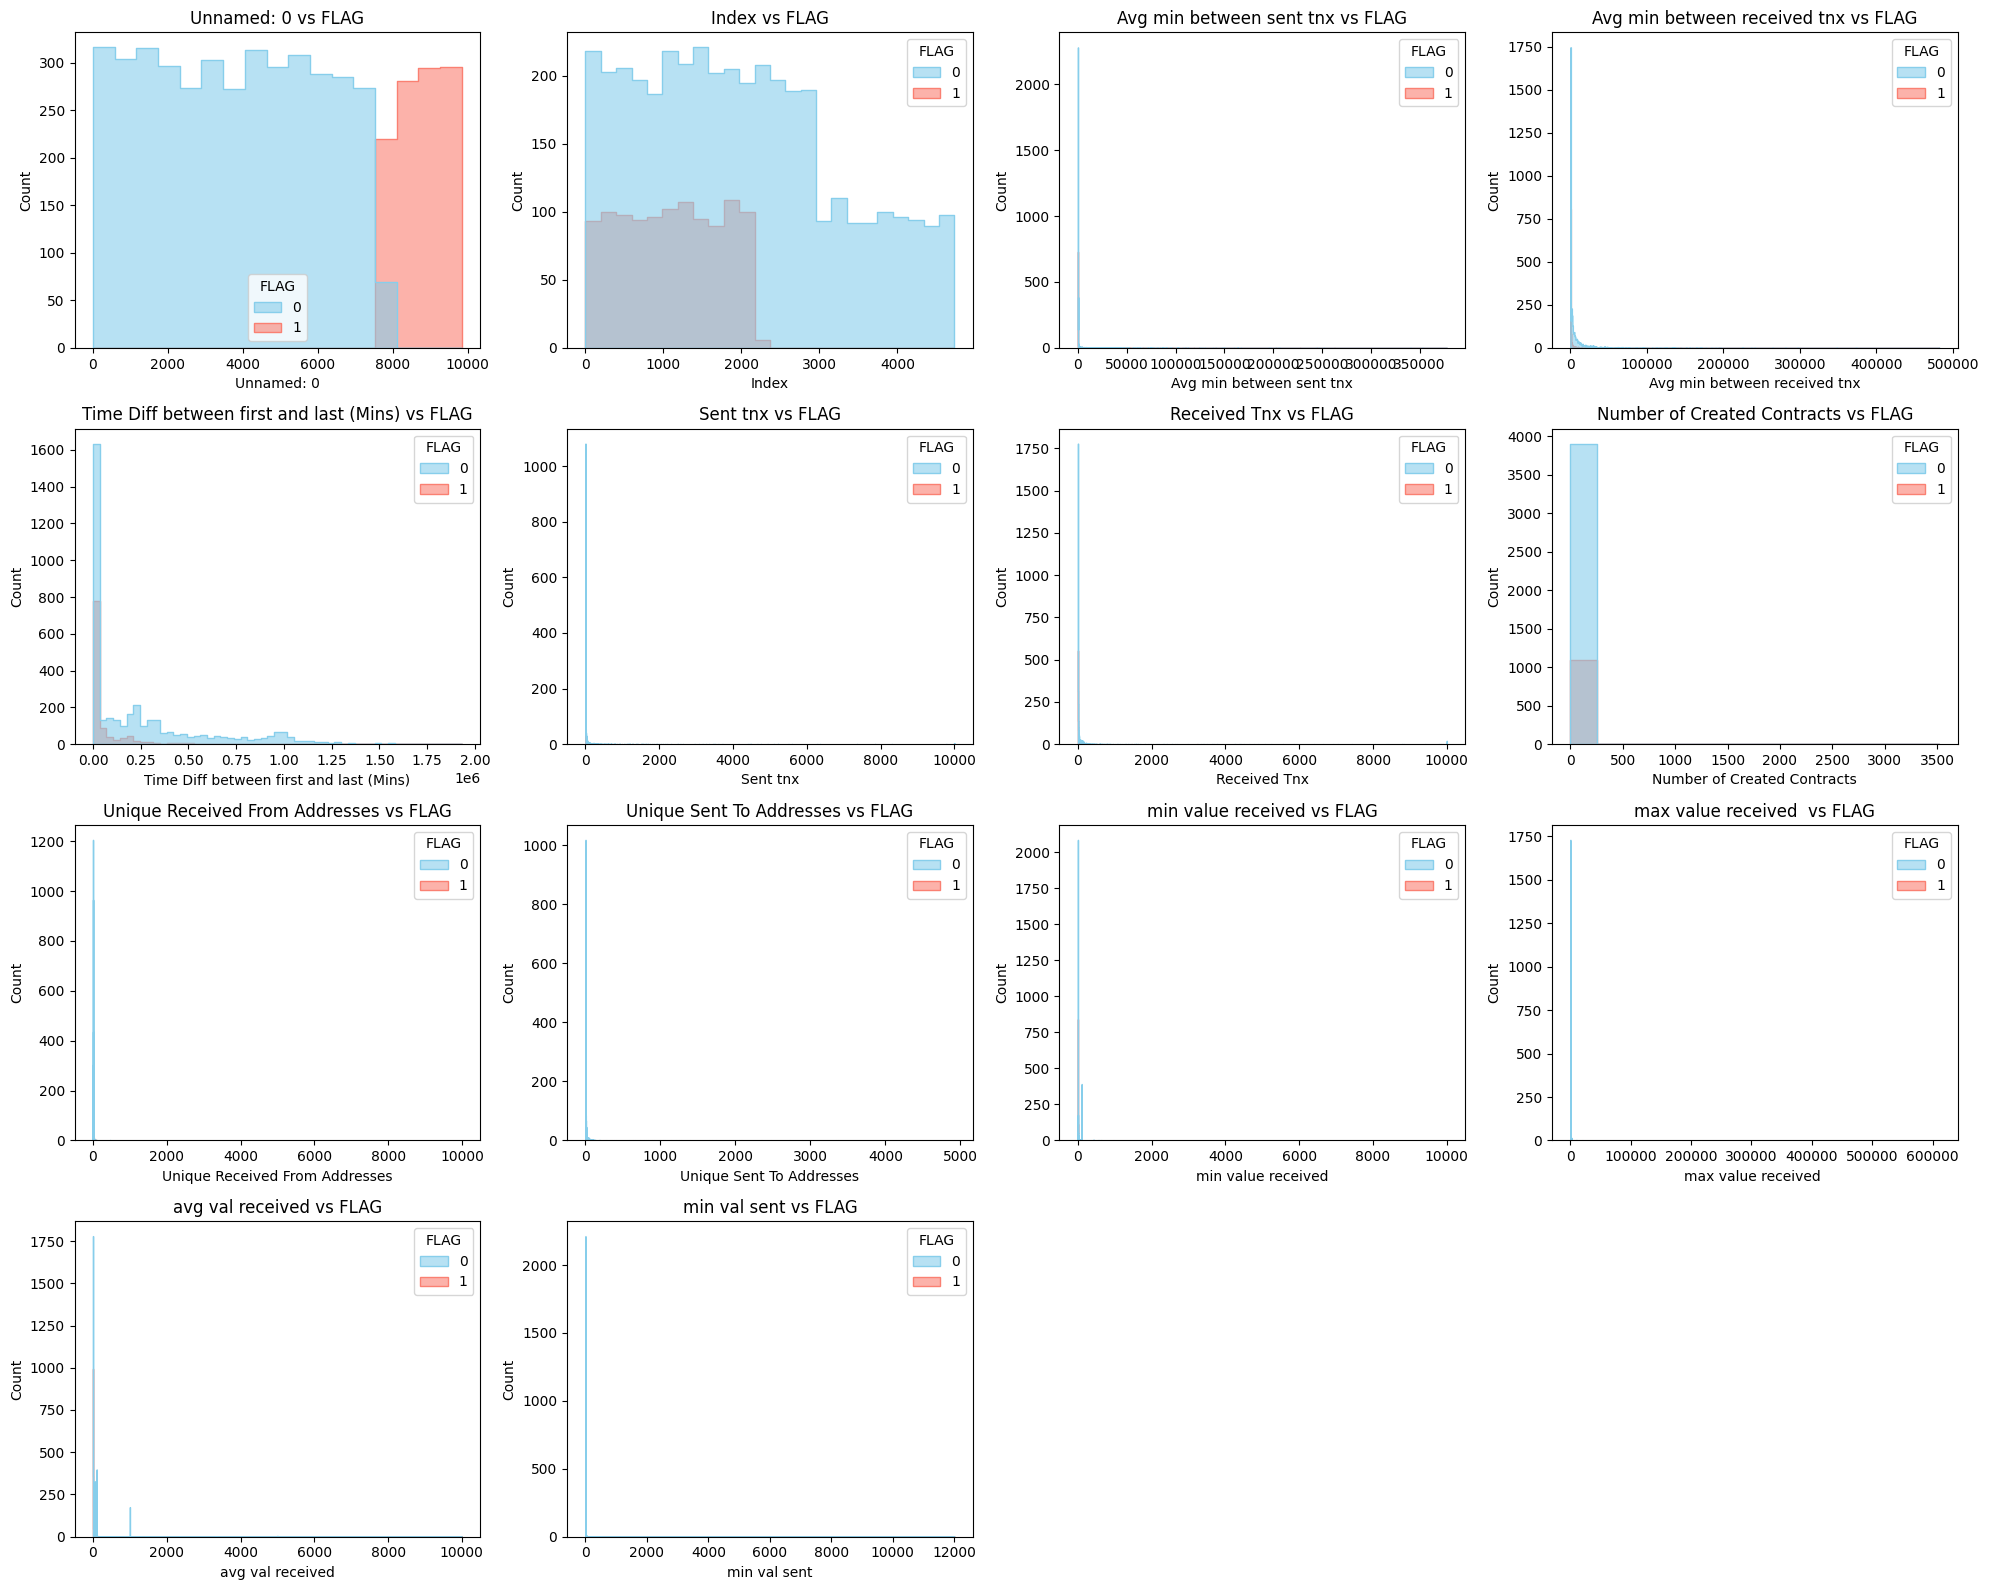

In [10]:
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np

# Optional: downsample to reduce memory usage
df_sampled = df.sample(n=5000, random_state=42)

# Drop the 'FLAG' column for feature selection
features = df_sampled.drop(columns=['FLAG'])

# Select only numerical features
numerical_features = features.select_dtypes(include=np.number)

# Get a subset of numerical columns (limit to avoid memory crash)
plot_columns = numerical_features.columns[:14]

# Number of plots
num_columns = len(plot_columns)
n_cols = 4
n_rows = (num_columns + n_cols - 1) // n_cols

# Create subplots
fig, axes = plt.subplots(n_rows, n_cols, figsize=(n_cols * 5, n_rows * 4))
axes = axes.flatten()

# Define colors for class hue
colors = ['skyblue', 'salmon']

# Plot histograms for each selected column
for idx, col in enumerate(plot_columns):
    sns.histplot(data=df_sampled, x=col, hue='FLAG', ax=axes[idx],
                 palette=colors, element='step', alpha=0.6, common_norm=False)
    axes[idx].set_title(f'{col} vs FLAG')

# Hide unused axes
for i in range(num_columns, len(axes)):
    fig.delaxes(axes[i])

plt.tight_layout()
plt.show()
plt.close()  # Free memory


## Data Processing

In [11]:
# 1. Clean column names
df.columns = df.columns.str.strip()

In [12]:

# 2. Handle missing values
missing = df.isnull().sum()
# Drop columns with excessive missing values if needed
# For others, impute:
for col in df.columns:
    if df[col].dtype in ['float64', 'int64']:
        df[col].fillna(df[col].median(), inplace=True)
    else:
        df[col].fillna(df[col].mode()[0], inplace=True)


<ipython-input-12-3b4f0eaf84b6>:7: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df[col].method(value, inplace=True)', try using 'df.method({col: value}, inplace=True)' or df[col] = df[col].method(value) instead, to perform the operation inplace on the original object.


  df[col].fillna(df[col].median(), inplace=True)
<ipython-input-12-3b4f0eaf84b6>:7: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df[col].method(value, inplace=True)', try using 

In [13]:
# 3. Remove duplicates
df.drop_duplicates(inplace=True)

In [14]:

# 4. Outlier detection
for col in df.select_dtypes(include=['float64', 'int64']):
    upper = df[col].quantile(0.99)
    df[col] = df[col].clip(upper=upper)

<ipython-input-14-0dee7d9974df>:4: FutureWarning: Downcasting behavior in Series and DataFrame methods 'where', 'mask', and 'clip' is deprecated. In a future version this will not infer object dtypes or cast all-round floats to integers. Instead call result.infer_objects(copy=False) for object inference, or cast round floats explicitly. To opt-in to the future behavior, set `pd.set_option('future.no_silent_downcasting', True)`
  df[col] = df[col].clip(upper=upper)
<ipython-input-14-0dee7d9974df>:4: FutureWarning: Downcasting behavior in Series and DataFrame methods 'where', 'mask', and 'clip' is deprecated. In a future version this will not infer object dtypes or cast all-round floats to integers. Instead call result.infer_objects(copy=False) for object inference, or cast round floats explicitly. To opt-in to the future behavior, set `pd.set_option('future.no_silent_downcasting', True)`
  df[col] = df[col].clip(upper=upper)


### Feature Engineering

In [15]:
from sklearn.preprocessing import StandardScaler
from sklearn.model_selection import train_test_split

def preprocess_data(df):
    # Drop columns not useful for ML or not present in Kaggle data
    drop_cols = ['Unnamed: 0', 'Index', 'Address']
    for c in drop_cols:
        if c in df.columns:
            df = df.drop(columns=[c])

    # Select only numeric columns except 'FLAG'
    numeric_cols = df.select_dtypes(include=['int64', 'float64']).columns.tolist()
    if 'FLAG' in numeric_cols:
        numeric_cols.remove('FLAG')

    X = df[numeric_cols].fillna(0)
    y = df['FLAG']

    return X, y

X, y = preprocess_data(df)
X_train, X_test, y_train, y_test = train_test_split(
    X, y, test_size=0.2, random_state=42, stratify=y
)

print("features", X.columns)


features Index(['Avg min between sent tnx', 'Avg min between received tnx',
       'Time Diff between first and last (Mins)', 'Sent tnx', 'Received Tnx',
       'Number of Created Contracts', 'Unique Received From Addresses',
       'Unique Sent To Addresses', 'min value received', 'max value received',
       'avg val received', 'min val sent', 'max val sent', 'avg val sent',
       'min value sent to contract', 'max val sent to contract',
       'avg value sent to contract',
       'total transactions (including tnx to create contract',
       'total Ether sent', 'total ether received',
       'total ether sent contracts', 'total ether balance', 'Total ERC20 tnxs',
       'ERC20 total Ether received', 'ERC20 total ether sent',
       'ERC20 total Ether sent contract', 'ERC20 uniq sent addr',
       'ERC20 uniq rec addr', 'ERC20 uniq sent addr.1',
       'ERC20 uniq rec contract addr', 'ERC20 avg time between sent tnx',
       'ERC20 avg time between rec tnx', 'ERC20 avg time between 

### Data Balanacing

In [16]:
!pip install imblearn

   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 238.4/238.4 kB 6.2 MB/s eta 0:00:00


Class distribution before resampling: [6129 1743]
Class distribution after resampling: [2297 1838]


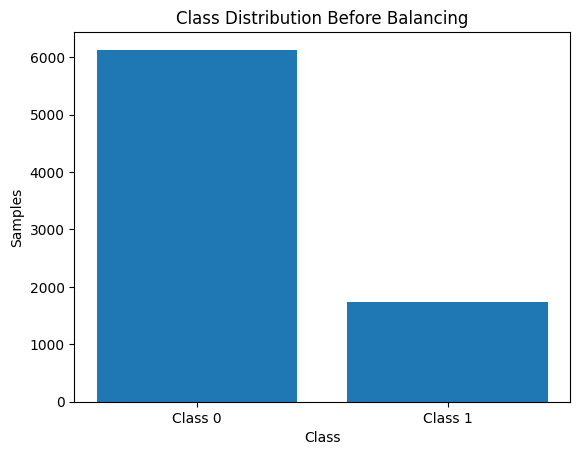

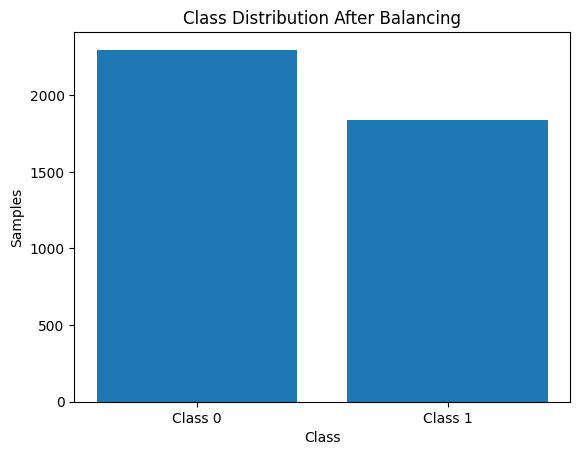

In [17]:
from imblearn.over_sampling import SMOTE
from imblearn.under_sampling import RandomUnderSampler
from imblearn.pipeline import Pipeline

import matplotlib.pyplot as plt
import numpy as np

print('Class distribution before resampling:', np.bincount(y_train))

# Try less aggressive balancing
over = SMOTE(sampling_strategy=0.3, random_state=42)
under = RandomUnderSampler(sampling_strategy=0.8, random_state=42)

resample_pipeline = Pipeline([
    ('o', over),
    ('u', under)
])
X_train_res, y_train_res = resample_pipeline.fit_resample(X_train, y_train)

print('Class distribution after resampling:', np.bincount(y_train_res))

def plot_class_distribution(y, title):
    counts = np.bincount(y)
    plt.bar(range(len(counts)), counts, tick_label=[f"Class {i}" for i in range(len(counts))])
    plt.title(title)
    plt.xlabel("Class")
    plt.ylabel("Samples")
    plt.show()

plot_class_distribution(y_train.values, "Class Distribution Before Balancing")
plot_class_distribution(y_train_res, "Class Distribution After Balancing")


#3. Machine Learning Models

In [18]:
!pip install pandas numpy requests scikit-learn imbalanced-learn xgboost tensorflow shap lime matplotlib imblearn

     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 275.7/275.7 kB 7.5 MB/s eta 0:00:00
  Installing build dependencies ... done
  Getting requirements to build wheel ... done
  Preparing metadata (pyproject.toml) ... done
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 253.9/253.9 MB 3.3 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 644.9/644.9 MB 522.4 kB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 1.0/1.0 MB 50.3 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 57.5/57.5 kB 4.0 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 24.5/24.5 MB 80.2 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 5.5/5.5 MB 112.2 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 5.1/5.1 MB 91.9 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 322.4/322.4 MB 3.3 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 6.6/6.6 MB 107.7 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 224.5/224.5 kB 13.6 MB/s eta 0:0

## 1. XGBoost Model

In [19]:
import xgboost as xgb
from sklearn.metrics import classification_report, roc_auc_score

from sklearn.preprocessing import StandardScaler

# Scale features
scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train_res)
X_test_scaled = scaler.transform(X_test)

# Train XGBoost model
xgb_model = xgb.XGBClassifier(
    objective='binary:logistic',
    n_estimators=200,
    max_depth=6,
    learning_rate=0.1,
    subsample=0.8,
    colsample_bytree=0.8,
    random_state=42,
    scale_pos_weight=(len(y_train_res) - sum(y_train_res)) / sum(y_train_res)
)
xgb_model.fit(X_train_scaled, y_train_res)

# Predict and evaluate
y_pred_xgb = xgb_model.predict(X_test_scaled)
y_proba_xgb = xgb_model.predict_proba(X_test_scaled)[:, 1]

print("XGBoost Performance:")
print(classification_report(y_test, y_pred_xgb, digits=4))
print("ROC-AUC:", roc_auc_score(y_test, y_proba_xgb))

XGBoost Performance:
              precision    recall  f1-score   support

           0     0.9889    0.9883    0.9886      1533
           1     0.9588    0.9610    0.9599       436

    accuracy                         0.9822      1969
   macro avg     0.9739    0.9746    0.9742      1969
weighted avg     0.9822    0.9822    0.9822      1969

ROC-AUC: 0.9977872134149626


## 2. LSTM Model (requires 3D input)

In [20]:
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import LSTM, Dense, Dropout, Masking
from tensorflow.keras.optimizers import Adam
from sklearn.metrics import classification_report, roc_auc_score
from sklearn.preprocessing import StandardScaler
import numpy as np

# Create artificial sequences (sliding window over rows)
def create_sequences(X, y, sequence_length=10):
    sequences, labels = [], []
    for i in range(len(X) - sequence_length):
        seq = X.iloc[i:i+sequence_length].values
        label = y.iloc[i+sequence_length-1]
        sequences.append(seq)
        labels.append(label)
    return np.array(sequences), np.array(labels)

X_sequences, y_sequences = create_sequences(X, y)

# Train/test split for sequences
from sklearn.model_selection import train_test_split
X_seq_train, X_seq_test, y_seq_train, y_seq_test = train_test_split(
    X_sequences, y_sequences, test_size=0.2, random_state=42, stratify=y_sequences
)

# Resample to balance classes
X_seq_train_2d = X_seq_train.reshape(X_seq_train.shape[0], -1)
X_seq_train_res, y_seq_train_res = resample_pipeline.fit_resample(X_seq_train_2d, y_seq_train)
X_seq_train_res = X_seq_train_res.reshape(-1, X_seq_train.shape[1], X_seq_train.shape[2])

# Scale features
seq_scaler = StandardScaler()
X_seq_train_res_flat = X_seq_train_res.reshape(-1, X_seq_train_res.shape[2])
X_seq_train_scaled = seq_scaler.fit_transform(X_seq_train_res_flat).reshape(X_seq_train_res.shape)
X_seq_test_flat = X_seq_test.reshape(-1, X_seq_test.shape[2])
X_seq_test_scaled = seq_scaler.transform(X_seq_test_flat).reshape(X_seq_test.shape)

# LSTM Model
lstm_model = Sequential([
    Masking(mask_value=0., input_shape=(X_seq_train_scaled.shape[1], X_seq_train_scaled.shape[2])),
    LSTM(64, return_sequences=True),
    Dropout(0.2),
    LSTM(32),
    Dropout(0.2),
    Dense(1, activation='sigmoid')
])
lstm_model.compile(
    optimizer=Adam(learning_rate=0.001),
    loss='binary_crossentropy',
    metrics=['accuracy']
)
history_lstm = lstm_model.fit(
    X_seq_train_scaled, y_seq_train_res,
    validation_data=(X_seq_test_scaled, y_seq_test),
    epochs=10,
    batch_size=64,
    class_weight={0: 1., 1: 5.}
)

# Evaluation
y_pred_lstm = (lstm_model.predict(X_seq_test_scaled) > 0.5).astype(int)
y_proba_lstm = lstm_model.predict(X_seq_test_scaled)
print("LSTM Performance:")
print(classification_report(y_seq_test, y_pred_lstm, digits=4))
print("ROC-AUC:", roc_auc_score(y_seq_test, y_proba_lstm))


/usr/local/lib/python3.11/dist-packages/keras/src/layers/core/masking.py:47: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(**kwargs)


Epoch 1/10
65/65 ━━━━━━━━━━━━━━━━━━━━ 5s 23ms/step - accuracy: 0.6599 - loss: 1.1049 - val_accuracy: 0.9624 - val_loss: 0.1608
Epoch 2/10
65/65 ━━━━━━━━━━━━━━━━━━━━ 1s 16ms/step - accuracy: 0.9801 - loss: 0.1275 - val_accuracy: 0.9919 - val_loss: 0.0388
Epoch 3/10
65/65 ━━━━━━━━━━━━━━━━━━━━ 1s 15ms/step - accuracy: 0.9947 - loss: 0.0552 - val_accuracy: 0.9954 - val_loss: 0.0214
Epoch 4/10
65/65 ━━━━━━━━━━━━━━━━━━━━ 1s 16ms/step - accuracy: 0.9977 - loss: 0.0249 - val_accuracy: 0.9954 - val_loss: 0.0225
Epoch 5/10
65/65 ━━━━━━━━━━━━━━━━━━━━ 1s 17ms/step - accuracy: 0.9961 - loss: 0.0242 - val_accuracy: 0.9878 - val_loss: 0.0388
Epoch 6/10
65/65 ━━━━━━━━━━━━━━━━━━━━ 1s 17ms/step - accuracy: 0.9964 - loss: 0.0303 - val_accuracy: 0.9934 - val_loss: 0.0211
Epoch 7/10
65/65 ━━━━━━━━━━━━━━━━━━━━ 1s 16ms/step - accuracy: 0.9984 - loss: 0.0162 - val_accuracy: 0.9975 - val_loss: 0.0101
Epoch 8/10
65/65 ━━━━━━━━━━━━━━━━━━━━ 1s 16ms/step - accuracy: 0.9994 - loss: 0.0096 - val_accuracy: 0.9980 - v

## 3. CNN Model

In [21]:
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Conv1D, GlobalMaxPooling1D, Dense, Dropout
from tensorflow.keras.optimizers import Adam
from sklearn.metrics import classification_report, roc_auc_score

# CNN model definition
cnn_model = Sequential([
    Conv1D(filters=64, kernel_size=3, activation='relu', input_shape=(X_seq_train_scaled.shape[1], X_seq_train_scaled.shape[2])),
    GlobalMaxPooling1D(),
    Dense(64, activation='relu'),
    Dropout(0.3),
    Dense(1, activation='sigmoid')
])

# Compile model
cnn_model.compile(
    optimizer=Adam(learning_rate=0.001),
    loss='binary_crossentropy',
    metrics=['accuracy']
)

# Train model
history_cnn = cnn_model.fit(
    X_seq_train_scaled, y_seq_train_res,
    validation_data=(X_seq_test_scaled, y_seq_test),
    epochs=10,
    batch_size=64,
    class_weight={0: 1., 1: 5.}
)

# Evaluate
y_pred_cnn = (cnn_model.predict(X_seq_test_scaled) > 0.5).astype(int)
y_proba_cnn = cnn_model.predict(X_seq_test_scaled)
print("CNN Performance:")
print(classification_report(y_seq_test, y_pred_cnn, digits=4))
print("ROC-AUC:", roc_auc_score(y_seq_test, y_proba_cnn))

import pickle

with open('cnn_model.pkl', 'wb') as f:
    pickle.dump(cnn_model, f)



Epoch 1/10


/usr/local/lib/python3.11/dist-packages/keras/src/layers/convolutional/base_conv.py:107: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


65/65 ━━━━━━━━━━━━━━━━━━━━ 2s 8ms/step - accuracy: 0.6106 - loss: 1.3682 - val_accuracy: 0.8409 - val_loss: 0.3307
Epoch 2/10
65/65 ━━━━━━━━━━━━━━━━━━━━ 0s 5ms/step - accuracy: 0.9068 - loss: 0.3189 - val_accuracy: 0.8953 - val_loss: 0.2600
Epoch 3/10
65/65 ━━━━━━━━━━━━━━━━━━━━ 0s 5ms/step - accuracy: 0.9601 - loss: 0.1490 - val_accuracy: 0.9527 - val_loss: 0.1117
Epoch 4/10
65/65 ━━━━━━━━━━━━━━━━━━━━ 0s 5ms/step - accuracy: 0.9804 - loss: 0.0877 - val_accuracy: 0.9644 - val_loss: 0.0820
Epoch 5/10
65/65 ━━━━━━━━━━━━━━━━━━━━ 0s 5ms/step - accuracy: 0.9876 - loss: 0.0573 - val_accuracy: 0.9715 - val_loss: 0.0686
Epoch 6/10
65/65 ━━━━━━━━━━━━━━━━━━━━ 0s 5ms/step - accuracy: 0.9896 - loss: 0.0396 - val_accuracy: 0.9878 - val_loss: 0.0377
Epoch 7/10
65/65 ━━━━━━━━━━━━━━━━━━━━ 0s 5ms/step - accuracy: 0.9906 - loss: 0.0427 - val_accuracy: 0.9807 - val_loss: 0.0484
Epoch 8/10
65/65 ━━━━━━━━━━━━━━━━━━━━ 0s 5ms/step - accuracy: 0.9939 - loss: 0.0273 - val_accuracy: 0.9908 - val_loss: 0.0255
Epo

### GNN

In [22]:
!pip install torch_geometric

     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 63.1/63.1 kB 1.8 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 1.1/1.1 MB 17.9 MB/s eta 0:00:00


In [23]:
import torch
from torch_geometric.data import Data
from torch_geometric.nn import GCNConv
import numpy as np
import pandas as pd


# Feature engineering for nodes
node_features = df.copy()
drop_cols = ['Unnamed: 0', 'Index', 'Address', 'FLAG']
for c in drop_cols:
    if c in node_features.columns:
        node_features = node_features.drop(columns=[c])

node_features = node_features.select_dtypes(include=[np.number])
node_features = node_features.fillna(0)
x = torch.tensor(node_features.values, dtype=torch.float)

y = torch.tensor(df['FLAG'].values, dtype=torch.long)

# Create a synthetic edge index (fully connected or k-NN for demo)
num_nodes = len(df)
# Here, just connect each node to its next (ring), for a simple demo
edge_index = torch.tensor([
    [i for i in range(num_nodes)] + [i for i in range(num_nodes)],
    [(i + 1) % num_nodes for i in range(num_nodes)] + [i for i in range(num_nodes)]
], dtype=torch.long)

# Create graph data
data = Data(x=x, edge_index=edge_index, y=y)

# Split train/test
from sklearn.model_selection import train_test_split
idx = np.arange(num_nodes)
train_idx, test_idx = train_test_split(idx, test_size=0.2, stratify=y, random_state=42)
train_mask = torch.zeros(num_nodes, dtype=torch.bool)
test_mask = torch.zeros(num_nodes, dtype=torch.bool)
train_mask[train_idx] = True
test_mask[test_idx] = True

# GCN model definition
class SimpleGCN(torch.nn.Module):
    def __init__(self, in_channels, hidden_channels, num_classes):
        super().__init__()
        self.conv1 = GCNConv(in_channels, hidden_channels)
        self.conv2 = GCNConv(hidden_channels, num_classes)
    def forward(self, x, edge_index):
        x = self.conv1(x, edge_index).relu()
        x = self.conv2(x, edge_index)
        return x

device = torch.device('cuda' if torch.cuda.is_available() else 'cpu')
model = SimpleGCN(x.shape[1], 16, 2).to(device)
data = data.to(device)
train_mask, test_mask = train_mask.to(device), test_mask.to(device)

# Weighted loss for imbalance
weights = torch.tensor([1.0, float((y == 0).sum()) / float((y == 1).sum() + 1e-8)], device=device)
loss_fn = torch.nn.CrossEntropyLoss(weight=weights)
optimizer = torch.optim.Adam(model.parameters(), lr=0.01, weight_decay=5e-4)

# Training loop
for epoch in range(1, 31):
    model.train()
    optimizer.zero_grad()
    out = model(data.x, data.edge_index)
    loss = loss_fn(out[train_mask], data.y[train_mask])
    loss.backward()
    optimizer.step()
    if epoch % 10 == 0:
        print(f'Epoch {epoch}, Loss: {loss.item():.4f}')

# Evaluation
model.eval()
with torch.no_grad():
    logits = model(data.x, data.edge_index)
    pred = logits.argmax(dim=1)
    probs = torch.softmax(logits, dim=1)[:, 1].cpu().numpy()
    y_true = data.y[test_mask].cpu().numpy()
    y_pred = pred[test_mask].cpu().numpy()
    from sklearn.metrics import classification_report, roc_auc_score
    print("GCN Performance:")
    print(classification_report(y_true, y_pred, digits=4))
    print("ROC-AUC:", roc_auc_score(y_true, probs[test_mask.cpu().numpy()]))

Epoch 10, Loss: 20680.5703
Epoch 20, Loss: 8430.7568
Epoch 30, Loss: 6010.2925
GCN Performance:
              precision    recall  f1-score   support

           0     0.7831    0.9843    0.8723      1533
           1     0.4286    0.0413    0.0753       436

    accuracy                         0.7755      1969
   macro avg     0.6058    0.5128    0.4738      1969
weighted avg     0.7046    0.7755    0.6958      1969

ROC-AUC: 0.5107811630370385


## Model Comparison

No GNN results found or variables not defined; skipping GNN in comparison.
Model Performance Comparison:
     Model  Accuracy  Precision    Recall  F1-Score   ROC-AUC
0  XGBoost  0.982224   0.958810  0.961009  0.959908  0.997787
1     LSTM  0.998475   0.993166  1.000000  0.996571  0.999996
2      CNN  0.993899   0.973214  1.000000  0.986425  0.999955


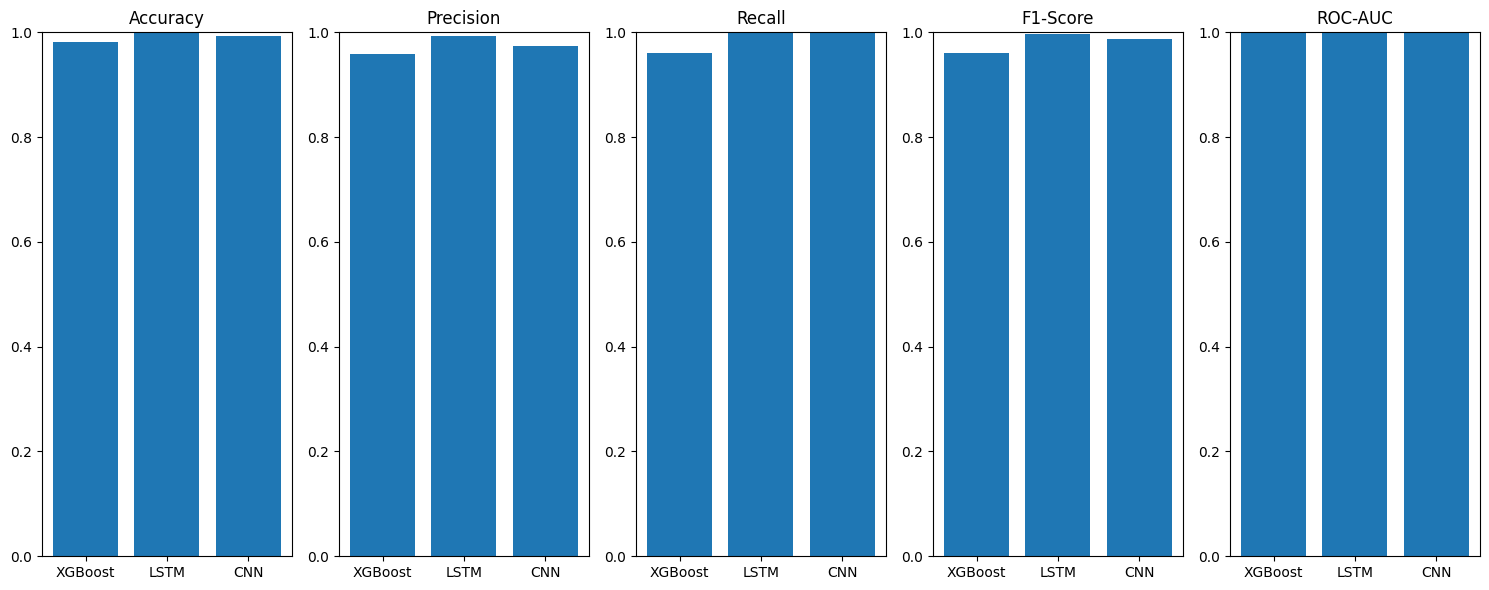

In [24]:
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score, roc_auc_score
import pandas as pd
import matplotlib.pyplot as plt

def evaluate_model(y_true, y_pred, y_proba, model_name):
    return {
        'Model': model_name,
        'Accuracy': accuracy_score(y_true, y_pred),
        'Precision': precision_score(y_true, y_pred, zero_division=0),
        'Recall': recall_score(y_true, y_pred, zero_division=0),
        'F1-Score': f1_score(y_true, y_pred, zero_division=0),
        'ROC-AUC': roc_auc_score(y_true, y_proba)
    }

results = [
    evaluate_model(y_test, y_pred_xgb, y_proba_xgb, 'XGBoost'),
    evaluate_model(y_seq_test, y_pred_lstm, y_proba_lstm, 'LSTM'),
    evaluate_model(y_seq_test, y_pred_cnn, y_proba_cnn, 'CNN')
]

try:
    results.append(
        evaluate_model(y_gnn_test, y_pred_gnn, y_proba_gnn, 'GNN')
    )
except Exception:
    print("No GNN results found or variables not defined; skipping GNN in comparison.")

results_df = pd.DataFrame(results)
print("Model Performance Comparison:")
print(results_df)

# Visualize
plt.figure(figsize=(15, 6))
metrics = ['Accuracy', 'Precision', 'Recall', 'F1-Score', 'ROC-AUC']
for i, metric in enumerate(metrics):
    plt.subplot(1, 5, i+1)
    plt.bar(results_df['Model'], results_df[metric])
    plt.title(metric)
    plt.ylim(0, 1)
plt.tight_layout()
plt.show()


## Explainability: SHAP for XGBoost

In [25]:
!pip install tf-keras

   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 1.7/1.7 MB 20.8 MB/s eta 0:00:00


/usr/local/lib/python3.11/dist-packages/torch_xla/__init__.py:251: UserWarning: `tensorflow` can conflict with `torch-xla`. Prefer `tensorflow-cpu` when using PyTorch/XLA. To silence this warning, `pip uninstall -y tensorflow && pip install tensorflow-cpu`. If you are in a notebook environment such as Colab or Kaggle, restart your notebook runtime afterwards.
  warnings.warn(


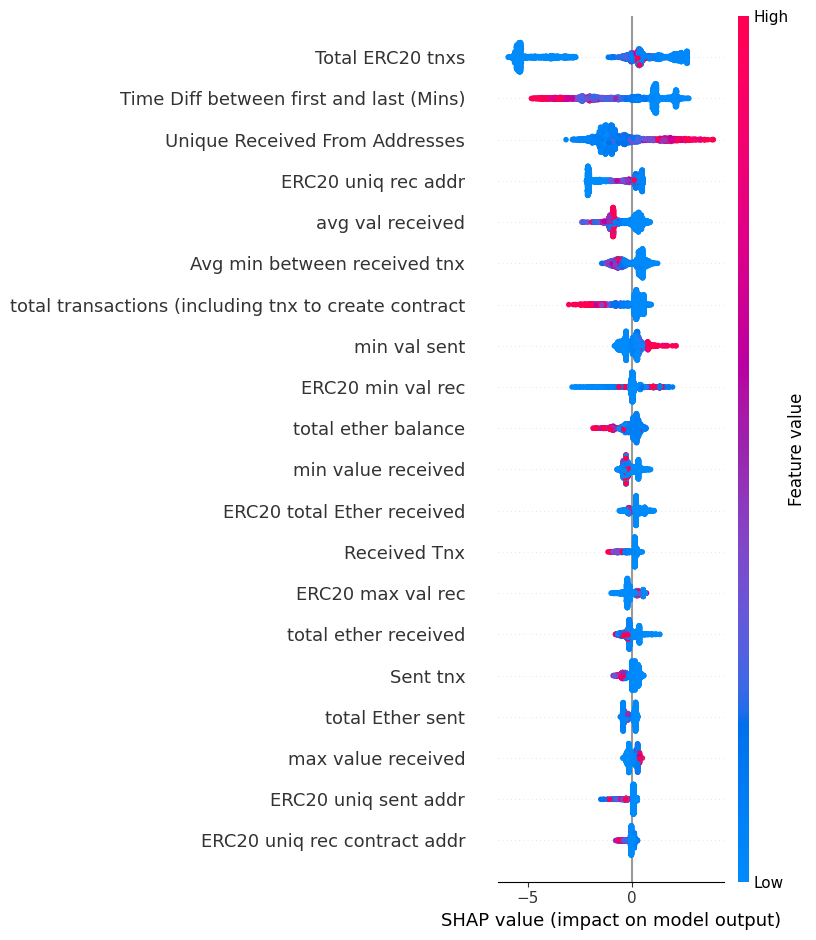

In [26]:
import shap

# Explain XGBoost predictions using SHAP
explainer_xgb = shap.TreeExplainer(xgb_model)
shap_values_xgb = explainer_xgb.shap_values(X_test_scaled)

# SHAP summary plot (global feature importance)
shap.summary_plot(shap_values_xgb, X_test_scaled, feature_names=X.columns)

# SHAP force plot (local explanation for the first test example)
# For Colab: use shap.initjs() to enable interactive force plots
shap.initjs()
shap.force_plot(
    explainer_xgb.expected_value,
    shap_values_xgb[0, :],
    X_test_scaled[0, :],
    feature_names=X.columns
)


## Explainability: LIME for XGBoost

In [27]:
import lime
import lime.lime_tabular

# LIME explainer setup for tabular data and XGBoost model
explainer_lime = lime.lime_tabular.LimeTabularExplainer(
    X_train_scaled,
    feature_names=X.columns,
    class_names=['Normal', 'Fraud'],
    mode='classification'
)

# Explain a single prediction (first test sample)
exp = explainer_lime.explain_instance(
    X_test_scaled[0],
    xgb_model.predict_proba,
    num_features=10
)
exp.show_in_notebook()

# 4. Real Time Etherscan Models Test

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 323ms/step
CNN prediction error: name 'X_seq_realtime_cnn' is not defined


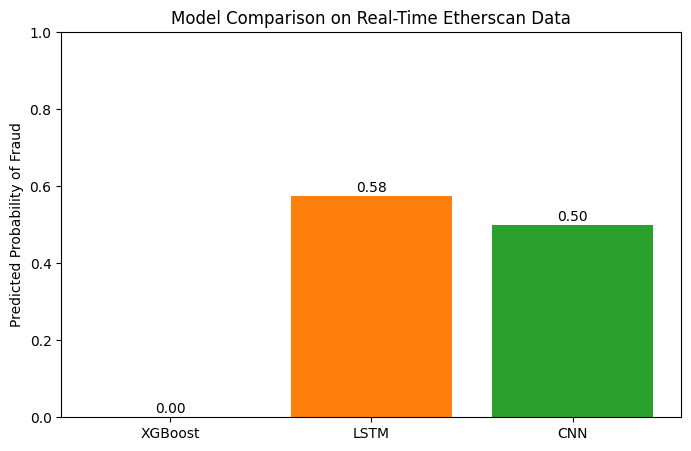

Real-time feature vector for XGBoost:
   Avg min between sent tnx  Avg min between received tnx  \
0                         0                             0   

   Time Diff between first and last (Mins)  Sent tnx  Received Tnx  \
0                                   1172.0         2             1   

   Number of Created Contracts  Unique Received From Addresses  \
0                            0                               1   

   Unique Sent To Addresses  min value received  max value received  ...  \
0                         2            0.012203            0.012203  ...   

   ERC20 max val rec  ERC20 avg val rec  ERC20 min val sent  \
0                  0                  0                   0   

   ERC20 max val sent  ERC20 avg val sent  ERC20 min val sent contract  \
0                   0                   0                            0   

   ERC20 max val sent contract  ERC20 avg val sent contract  \
0                            0                            0   

   ERC20 

In [28]:
import requests
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from datetime import datetime

# 1. Retrieve Etherscan data
ETHERSCAN_API_KEY = "V8RHS7P2YNSAHUY92CXVANVQK8MIYK95UQ"
address = "0xe88991d082C0D7C0356E9652d8abA741D1aBef29"
url = f"https://api.etherscan.io/api?module=account&action=txlist&address={address}&sort=asc&apikey={ETHERSCAN_API_KEY}"
response = requests.get(url)
data = response.json()

# 2. Get your training feature names (must match training exactly)
feature_names = X_train.columns.tolist()  # Use your own training DataFrame


# 3. Preprocess Etherscan data for the sequence models
def preprocess_etherscan_response(data, feature_names, address, seq_len=3):
    txs = data.get("result", [])
    if not txs or isinstance(txs, str):
        raise ValueError("No transaction data found for this address.")

    # Sort transactions by time (ascending)
    txs = sorted(txs, key=lambda x: int(x['timeStamp']))

    # Use last seq_len transactions (pad if needed)
    if len(txs) >= seq_len:
        txs_sequence = txs[-seq_len:]
    else:
        txs_sequence = [txs[0]] * (seq_len - len(txs)) + txs

    features_list = []
    for i, tx in enumerate(txs_sequence):
        features = {}
        is_sender = tx['from'].lower() == address.lower()
        is_receiver = tx['to'].lower() == address.lower()
        value_eth = float(tx['value']) / 1e18  # Convert from Wei to ETH

        features["Sent tnx"] = int(is_sender)
        features["Received Tnx"] = int(is_receiver)
        features["Unique Received From Addresses"] = 1 if is_receiver else 0
        features["Unique Sent To Addresses"] = 1 if is_sender else 0
        features["total ether received"] = value_eth if is_receiver else 0
        features["avg val received"] = value_eth if is_receiver else 0
        features["avg val sent"] = value_eth if is_sender else 0
        features["min value received"] = value_eth if is_receiver else 0
        features["max value received"] = value_eth if is_receiver else 0
        features["min val sent"] = value_eth if is_sender else 0
        features["max val sent"] = value_eth if is_sender else 0
        features["total Ether sent"] = value_eth if is_sender else 0

        # Time processing
        tx_time = int(tx['timeStamp'])
        features["timeStamp"] = tx_time

        features_list.append(features)

    df = pd.DataFrame(features_list)

    # Time-based features across the sequence
    if len(df) > 1:
        time_diff_mins = (df["timeStamp"].iloc[-1] - df["timeStamp"].iloc[0]) / 60.0
    else:
        time_diff_mins = 0

    df["Time Diff between first and last (Mins)"] = time_diff_mins

    # Aggregate features if needed for single row
    df.drop(columns=["timeStamp"], inplace=True, errors='ignore')

    # Combine repeated features (e.g., total, min, max)
    df_agg = {
        "Sent tnx": df["Sent tnx"].sum(),
        "Received Tnx": df["Received Tnx"].sum(),
        "Unique Received From Addresses": df["Unique Received From Addresses"].sum(),
        "Unique Sent To Addresses": df["Unique Sent To Addresses"].sum(),
        "total ether received": df["total ether received"].sum(),
        "avg val received": df["avg val received"].mean(),
        "avg val sent": df["avg val sent"].mean(),
        "min value received": df["min value received"].replace(0, np.nan).min() or 0,
        "max value received": df["max value received"].max(),
        "min val sent": df["min val sent"].replace(0, np.nan).min() or 0,
        "max val sent": df["max val sent"].max(),
        "total Ether sent": df["total Ether sent"].sum(),
        "Time Diff between first and last (Mins)": time_diff_mins,
    }

    df_final = pd.DataFrame([df_agg])

    # Align with training features
    df_aligned = df_final.reindex(columns=feature_names, fill_value=0)
    return df_aligned


# 4. Preprocess real-time data for both sequence and single-row models
df_realtime_seq = preprocess_etherscan_response(data, feature_names, address, seq_len=3)
df_realtime_single = df_realtime_seq.iloc[[-1]]  # Use last tx for XGBoost

# 5. XGBoost prediction (single feature vector)
X_realtime_scaled = scaler.transform(df_realtime_single)
xgb_pred = xgb_model.predict(X_realtime_scaled)
xgb_proba = xgb_model.predict_proba(X_realtime_scaled)[:, 1]

# 6. LSTM/CNN prediction (sequence)
X_seq_realtime_scaled = seq_scaler.transform(df_realtime_seq.values)
X_seq_realtime_scaled = X_seq_realtime_scaled.reshape((1, df_realtime_seq.shape[0], df_realtime_seq.shape[1]))  # (1, timesteps, features)
lstm_pred = lstm_model.predict(X_seq_realtime_scaled)
lstm_proba = lstm_pred.reshape(-1)

try:
    cnn_pred = cnn_model.predict(X_seq_realtime_cnn)
    cnn_proba = cnn_pred.reshape(-1)
except Exception as e:
    print(f"CNN prediction error: {e}")
    # Provide fallback values if CNN fails
    cnn_pred = [0]
    cnn_proba = [0.5]

# 7. Results DataFrame
results = pd.DataFrame({
    "Model": ["XGBoost", "LSTM", "CNN"],
    "Prediction": [xgb_pred[0], lstm_pred[0], cnn_pred[0]],
    "Fraud Probability": [xgb_proba[0], lstm_proba[0], cnn_proba[0]]
})

# 8. Plot
plt.figure(figsize=(8, 5))
plt.bar(results["Model"], results["Fraud Probability"], color=['C0', 'C1', 'C2'])
plt.ylabel("Predicted Probability of Fraud")
plt.title("Model Comparison on Real-Time Etherscan Data")
plt.ylim(0, 1)
for i, v in enumerate(results["Fraud Probability"]):
    plt.text(i, v + 0.01, f"{v:.2f}", ha='center')
plt.show()

# 1. Print the real-time feature vector used for XGBoost
print("Real-time feature vector for XGBoost:")
print(df_realtime_single)

# 2. Compare the real-time features to a few samples from your XGBoost training data
print("\nA few rows from your XGBoost training data:")
print(X_train.head())

# 3. Check for missing, all-zero, or all-NaN columns in the real-time vector
missing_features = df_realtime_single.columns[df_realtime_single.isnull().any()]
zero_features = df_realtime_single.columns[(df_realtime_single == 0).all()]
print("\nMissing (NaN) features in real-time input:", list(missing_features))
print("All-zero features in real-time input:", list(zero_features))

# 4. Check the range of values for a few important features in train vs. real-time
for feat in ["total ether received", "avg val sent", "avg val received"]:  # replace with your most important features
    print(f"\nFeature: {feat}")
    print("  Real-time value:", df_realtime_single[feat].values)
    print("  Training min/max:", X_train[feat].min(), "/", X_train[feat].max())

# 5. Test the XGBoost model on a few rows from your training data (do probabilities look reasonable?)
print("\nXGBoost probabilities on 5 training samples:")
train_probs = xgb_model.predict_proba(scaler.transform(X_train.head()))[:,1]
print(train_probs)

# 6. Print XGBoost feature importances (which features matter most?)
importances = xgb_model.feature_importances_
imp_df = pd.DataFrame({'feature': X_train.columns, 'importance': importances})
imp_df = imp_df.sort_values('importance', ascending=False)
print("\nTop 10 XGBoost Feature Importances:")
print(imp_df.head(10))

# 9. Print predictions
print(results)

In [29]:
import pickle

# Save LSTM model
with open("lstm_model.pkl", "wb") as f:
    pickle.dump(lstm_model, f)


In [31]:
print("Actual columns in X_train:", X_train.columns.tolist())

Actual columns in X_train: ['Avg min between sent tnx', 'Avg min between received tnx', 'Time Diff between first and last (Mins)', 'Sent tnx', 'Received Tnx', 'Number of Created Contracts', 'Unique Received From Addresses', 'Unique Sent To Addresses', 'min value received', 'max value received', 'avg val received', 'min val sent', 'max val sent', 'avg val sent', 'min value sent to contract', 'max val sent to contract', 'avg value sent to contract', 'total transactions (including tnx to create contract', 'total Ether sent', 'total ether received', 'total ether sent contracts', 'total ether balance', 'Total ERC20 tnxs', 'ERC20 total Ether received', 'ERC20 total ether sent', 'ERC20 total Ether sent contract', 'ERC20 uniq sent addr', 'ERC20 uniq rec addr', 'ERC20 uniq sent addr.1', 'ERC20 uniq rec contract addr', 'ERC20 avg time between sent tnx', 'ERC20 avg time between rec tnx', 'ERC20 avg time between rec 2 tnx', 'ERC20 avg time between contract tnx', 'ERC20 min val rec', 'ERC20 max val

In [32]:
# Select only the most relevant features for LSTM (simplified set)
lstm_features = [
    'Sent tnx',
    'Received Tnx',
    'Unique Received From Addresses',
    'Unique Sent To Addresses',
    'min value received',
    'max value received',
    'avg val received',
    'min val sent',
    'max val sent',
    'avg val sent',
    'total Ether sent',
    'total ether received',
    'Time Diff between first and last (Mins)'
]

# Verify all selected features exist in the dataframe
missing_features = [f for f in lstm_features if f not in X.columns]
if missing_features:
    print(f"Warning: The following features are missing: {missing_features}")
    # Remove missing features
    lstm_features = [f for f in lstm_features if f in X.columns]

# Select only the available features
X_lstm = X[lstm_features]

# Initialize and fit the scaler
from sklearn.preprocessing import StandardScaler
lstm_scaler = StandardScaler()
lstm_scaler.fit(X_lstm)

# Save the scaler
import pickle
with open("lstm_scaler.pkl", "wb") as f:
    pickle.dump(lstm_scaler, f)

print(f"Successfully scaled and saved {len(lstm_features)} features for LSTM")
print("Features used:", lstm_features)


Successfully scaled and saved 13 features for LSTM
Features used: ['Sent tnx', 'Received Tnx', 'Unique Received From Addresses', 'Unique Sent To Addresses', 'min value received', 'max value received', 'avg val received', 'min val sent', 'max val sent', 'avg val sent', 'total Ether sent', 'total ether received', 'Time Diff between first and last (Mins)']


In [ ]:
print("This is the End !!")